![title](rainfall.avif)

# Rainfall prediction model

I am Paras Joshi, a postgraduate student pursuing an M.Tech at the Indian Institute of Technology Roorkee, with a specialization in Artificial Intelligence and Advanced Instrumentation. Over the past few years, I have cultivated a deep interest in applying data-driven methodologies to address real-world challenges, particularly within the domain of Machine Learning.  

This project presents a predictive model for rainfall forecasting in Australia, aiming to contribute to more accurate weather prediction and informed decision-making in climate-sensitive sectors.


## About Dataset

The dataset used in this project is sourced from Kaggle and is titled Rainfall in Australia. Initially, it contains 145,460 rows and 23 columns. However, a significant number of missing values were present, which were subsequently addressed and removed. After cleaning the data, the final dataset comprises approximately 56,420 rows and retains the original 23 columns.  

The dataset is divided into three subsets: training, validation, and test sets.

### Features and target  
The original dataset includes 23 columns. Some of these were dropped due to their limited relevance in predicting rainfall. Additionally, one categorical feature was transformed using one-hot encoding. After feature selection and encoding, the final model utilizes 32 features and one target variable named "Raining".

Selected features are:- ['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm', 'SSW', 'S', 'NNE', 'WNW', 'N', 'SE', 'ENE', 'NE', 'E', 'SW', 'W', 'WSW', 'NNW', 'ESE', 'SSE', 'NW']

## Objectives  
The primary objective of this analysis is to build a robust and accurate classification model capable of predicting whether it will rain on a given day based on various meteorological features such as temperature, humidity, pressure, and cloud coverage. This is a binary classification task, where the target variable (rainfall) indicates either "rain" or "no rain". The analysis focuses on two key aspects: prediction accuracy and interpretability of the model. By evaluating multiple supervised learning algorithms, addressing class imbalance issues, and applying model selection techniques, the goal is to identify the model that best balances precision, recall, and overall performance. This exercise not only supports the business value of making reliable weather forecasts but also serves as a comprehensive demonstration of the techniques learned so far.

## Classification Models  
**Random Forest Classifier** An ensemble method using multiple decision trees to improve accuracy and reduce overfitting. Known for strong performance on tabular data.  

**Logistic Regression** A linear and interpretable model that estimates the probability of rainfall using a logistic function. Serves as a solid baseline classifier.  

**Gradient Boosting Classifier** A boosting ensemble technique that builds trees sequentially to correct previous errors. It is often effective for handling complex patterns.  

**XGBoost Classifier** An optimized implementation of gradient boosting known for its speed and high performance in classification challenges.  

## Model evaluation and interpretation  
All models were trained using the same feature set and evaluated on a held-out validation set (20%). Performance was assessed using the following metrics:  

Accuracy: Overall percentage of correctly predicted instances.  

Precision: How many predicted rainy days were actually correct (useful when false positives are costly).  

Recall: How many actual rainy days were correctly identified (important in weather warnings).  

Fl Score: The harmonic mean of precision and recall, balancing both metrics.  

The models were then compared using a bar chart visualization to highlight their strengths and trade-offs. The model with the most balanced and highest Fl Score, while maintaining high recall and precision, was selected as the final model for prediction on the test dataset.


In [613]:
import pandas as pd
import numpy as np
from matplotlib.pyplot import figure
from sklearn.utils import shuffle
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split, learning_curve
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, confusion_matrix, f1_score
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import GridSearchCV
from collections import Counter
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [614]:
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

## Exploratory Data Anslysis(EDA)

In [615]:
# reading dataset
df=pd.read_csv("weatherAUS.csv")
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [616]:
# checking for missing values
print("\n missing values in data set ")
print(df.isnull().sum())


 missing values in data set 
Date                 0
Location             0
MinTemp           1485
MaxTemp           1261
Rainfall          3261
Evaporation      62790
Sunshine         69835
WindGustDir      10326
WindGustSpeed    10263
WindDir9am       10566
WindDir3pm        4228
WindSpeed9am      1767
WindSpeed3pm      3062
Humidity9am       2654
Humidity3pm       4507
Pressure9am      15065
Pressure3pm      15028
Cloud9am         55888
Cloud3pm         59358
Temp9am           1767
Temp3pm           3609
RainToday         3261
RainTomorrow      3267
dtype: int64


In [617]:
# droping rows with missing values
df=df.dropna()
df.isnull().sum()

Date             0
Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
RainTomorrow     0
dtype: int64

we still have 56k observations left after dropping missing values, we may not need to impute any missing value

In [618]:
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
6049,2009-01-01,Cobar,17.9,35.2,0.0,12.0,12.3,SSW,48.0,ENE,...,20.0,13.0,1006.3,1004.4,2.0,5.0,26.6,33.4,No,No
6050,2009-01-02,Cobar,18.4,28.9,0.0,14.8,13.0,S,37.0,SSE,...,30.0,8.0,1012.9,1012.1,1.0,1.0,20.3,27.0,No,No
6052,2009-01-04,Cobar,19.4,37.6,0.0,10.8,10.6,NNE,46.0,NNE,...,42.0,22.0,1012.3,1009.2,1.0,6.0,28.7,34.9,No,No
6053,2009-01-05,Cobar,21.9,38.4,0.0,11.4,12.2,WNW,31.0,WNW,...,37.0,22.0,1012.7,1009.1,1.0,5.0,29.1,35.6,No,No
6054,2009-01-06,Cobar,24.2,41.0,0.0,11.2,8.4,WNW,35.0,NW,...,19.0,15.0,1010.7,1007.4,1.0,6.0,33.6,37.6,No,No


In [619]:
# Dropping the RainToday column and changing name of RainTomorrow column to Raining
df=df.drop(columns="RainToday")
df=df.rename(columns={'RainTomorrow':'Raining'})
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,Raining
6049,2009-01-01,Cobar,17.9,35.2,0.0,12.0,12.3,SSW,48.0,ENE,...,20.0,20.0,13.0,1006.3,1004.4,2.0,5.0,26.6,33.4,No
6050,2009-01-02,Cobar,18.4,28.9,0.0,14.8,13.0,S,37.0,SSE,...,19.0,30.0,8.0,1012.9,1012.1,1.0,1.0,20.3,27.0,No
6052,2009-01-04,Cobar,19.4,37.6,0.0,10.8,10.6,NNE,46.0,NNE,...,15.0,42.0,22.0,1012.3,1009.2,1.0,6.0,28.7,34.9,No
6053,2009-01-05,Cobar,21.9,38.4,0.0,11.4,12.2,WNW,31.0,WNW,...,6.0,37.0,22.0,1012.7,1009.1,1.0,5.0,29.1,35.6,No
6054,2009-01-06,Cobar,24.2,41.0,0.0,11.2,8.4,WNW,35.0,NW,...,13.0,19.0,15.0,1010.7,1007.4,1.0,6.0,33.6,37.6,No


In [620]:
df=df.drop(columns="Location")

In [621]:
df=df.drop(columns="Date")

In [622]:
df["Raining"]=df["Raining"].replace({"Yes":1,"No":0})

C:\Users\Paras Joshi\AppData\Local\Temp\ipykernel_5364\4292129583.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df["Raining"]=df["Raining"].replace({"Yes":1,"No":0})


In [623]:
print(f"Target distributation :\n  {df[target].value_counts()}")

Target distributation :
  Raining
0    43993
1    12427
Name: count, dtype: int64


### Applying OneHotEncoding

In [624]:
encoder=OneHotEncoder(sparse_output=False)
encoded_array=encoder.fit_transform(df[["WindGustDir"]])
encoder_df=pd.DataFrame(encoded_array,columns=df["WindGustDir"].unique())
df=pd.concat([df,encoder_df],axis=1)
df=df.drop(columns=["WindGustDir","WindDir9am","WindDir3pm"])

In [625]:
df=df.dropna()
df.shape

(15543, 33)

### Setting feature and target variable

In [626]:
# setting target and feeatures
target='Raining'
features=[col for col in df.columns if col not in['Raining']]

In [627]:
# printing features
print(features)

['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm', 'SSW', 'S', 'NNE', 'WNW', 'N', 'SE', 'ENE', 'NE', 'E', 'SW', 'W', 'WSW', 'NNW', 'ESE', 'SSE', 'NW']


In [628]:
x=df[features]
x.head()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,...,ENE,NE,E,SW,W,WSW,NNW,ESE,SSE,NW
6049,17.9,35.2,0.0,12.0,12.3,48.0,6.0,20.0,20.0,13.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
6050,18.4,28.9,0.0,14.8,13.0,37.0,19.0,19.0,30.0,8.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
6052,19.4,37.6,0.0,10.8,10.6,46.0,30.0,15.0,42.0,22.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6053,21.9,38.4,0.0,11.4,12.2,31.0,6.0,6.0,37.0,22.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
6054,24.2,41.0,0.0,11.2,8.4,35.0,17.0,13.0,19.0,15.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [629]:
y=df[target]
y.head()

6049    0.0
6050    0.0
6052    0.0
6053    0.0
6054    0.0
Name: Raining, dtype: float64

### Splitting the dataset into training, validation and test dataset

In [630]:
# splitting the dataset 
x_train,x_testr,y_train,y_testr= train_test_split(x,y,test_size=0.4,random_state=42)
print(x_train.shape)
print(x_testr.shape)
# here we have split the date set into 3 categories train, validation and test datasets.
x_val,x_test,y_val,y_test=train_test_split(x_testr,y_testr,test_size=0.5,random_state=42)
print(x_val.shape)
print(x_test.shape)

(9325, 32)
(6218, 32)
(3109, 32)
(3109, 32)


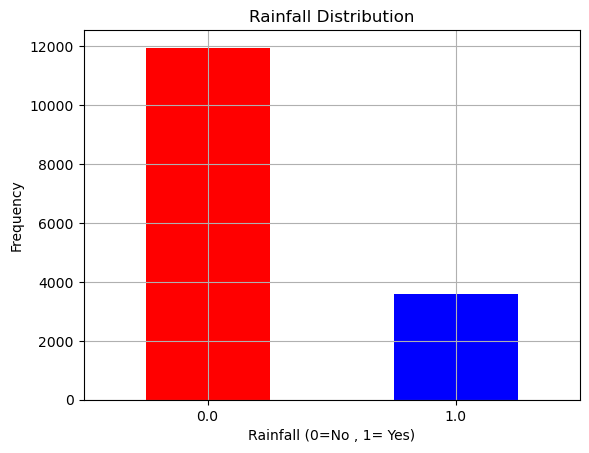

In [631]:
# visualize target distribution
df[target].value_counts().plot(kind='bar',color=['red','blue'])
plt.title("Rainfall Distribution")
plt.xlabel("Rainfall (0=No , 1= Yes)")
plt.ylabel("Frequency")
plt.xticks(rotation=0)
plt.grid()
plt.show()

### Observation  
The target variable 'rainfall' is imbalanced, with approximately 75% of the observations representing rainy days (1), and only 25% representing non-rainy days (0). This 3:1 ratio indicates a potential class imbalance. To ensure fair model learning and avoid bias toward the majority class, we may need to apply balancing techniques such as SMOTE, class weighting, or undersampling during model training

### Statistical summary

In [632]:
#Get summary of numerical columns
df.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,...,ENE,NE,E,SW,W,WSW,NNW,ESE,SSE,NW
count,15543.000000,15543.000000,15543.000000,15543.000000,15543.000000,15543.000000,15543.000000,15543.000000,15543.000000,15543.000000,...,15543.000000,15543.000000,15543.000000,15543.000000,15543.000000,15543.000000,15543.000000,15543.000000,15543.000000,15543.000000
mean,13.492074,23.593836,2.335875,5.334369,7.676639,41.381715,16.504278,20.378884,66.641961,51.331596,...,0.028437,0.036672,0.071029,0.093354,0.065946,0.064981,0.054623,0.064917,0.051020,0.058998
std,5.907430,5.939071,6.951480,3.776511,3.789936,13.194462,8.062311,8.886557,16.353502,20.411172,...,0.166224,0.187962,0.256881,0.290937,0.248196,0.246500,0.227250,0.246387,0.220045,0.235628
min,-6.700000,4.100000,0.000000,0.000000,0.000000,11.000000,2.000000,2.000000,6.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,9.400000,19.400000,0.000000,2.800000,5.100000,31.000000,11.000000,13.000000,56.000000,36.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,14.300000,23.200000,0.000000,4.600000,8.700000,39.000000,15.000000,20.000000,67.000000,52.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,18.200000,27.100000,0.800000,7.000000,10.500000,50.000000,20.000000,26.000000,79.000000,66.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,29.100000,47.300000,128.000000,65.400000,14.100000,117.000000,67.000000,65.000000,100.000000,99.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [633]:
df_train=pd.concat([x_train,y_train],axis=1)
df_test=pd.concat([x_test,y_test],axis=1)

In [634]:
df.shape

(15543, 33)

### Checking correlation of raining with other features

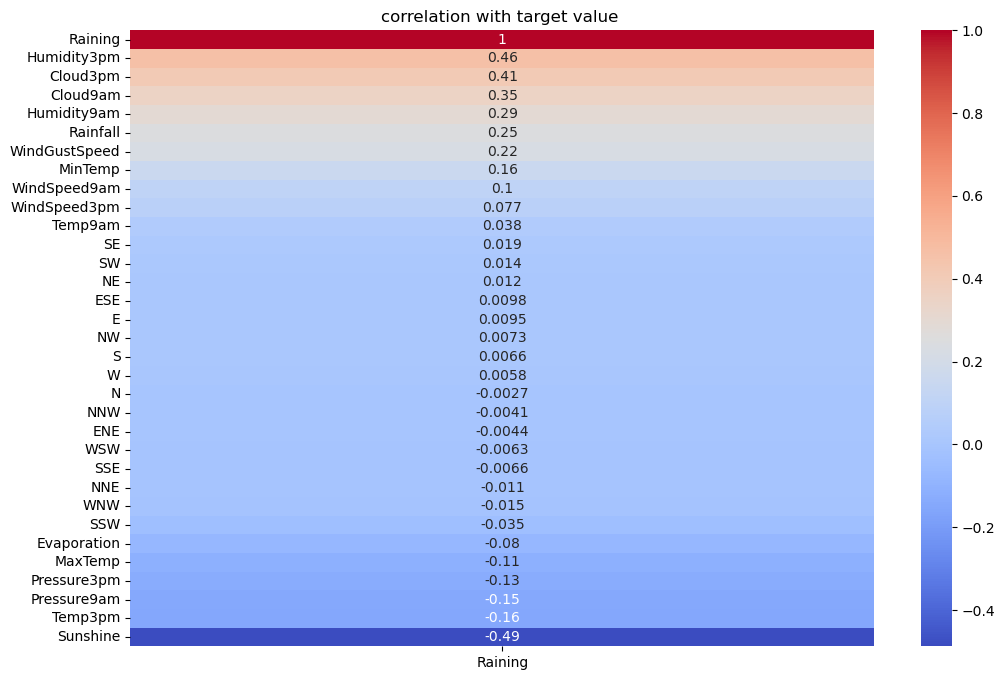

In [635]:
# checking the corelation between columns vs raining

correlation=df_train.corr()
#plotting heatmap
plt.figure(figsize=(12,8))
sns.heatmap(correlation[["Raining"]].sort_values(by='Raining',ascending=False),annot=True,cmap="coolwarm")
plt.title("correlation with target value ")
plt.show()

**Correlation Analysis** Interpretation From the correlation heatmap, we observe the following key relationships between features and the target variable raining:  

- Humidity3pm shows the strongest positive correlation with rainfall (0.46), suggesting that days with higher humidity values are more likely to have rain.  

- Cloud3pm also correlates positively (0.41), indicating that rain is more likely when cloud is high.  

- Sunshine displays the strongest negative correlation (-0.49), which makes intuitive sense  less sunshine often implies a higher chance of rain.  

- Other features like windspeed,evaporation,maxtemp metrics have weak correlations with rainfall, suggesting they may have less predictive power individually.  

- Variables such as  wind direction in W,S,N show near-zero correlation and may be less informative without further feature engineering.  

- These insights will help prioritize which features to focus on during model development and may guide feature selection or transformation strategies.


### Comparing train/test feature distribution

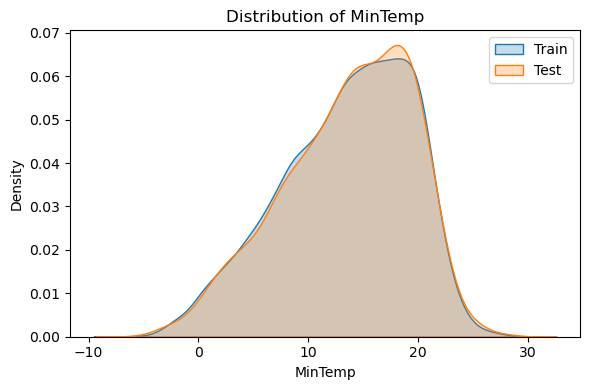

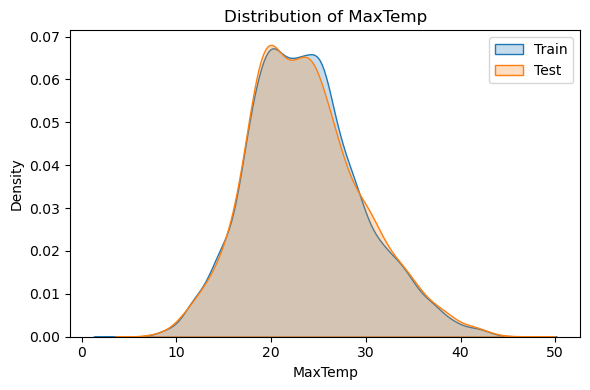

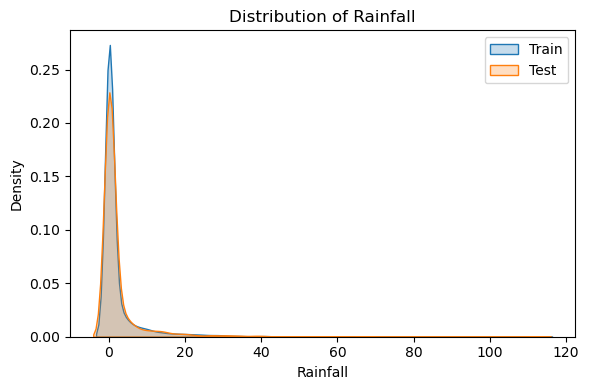

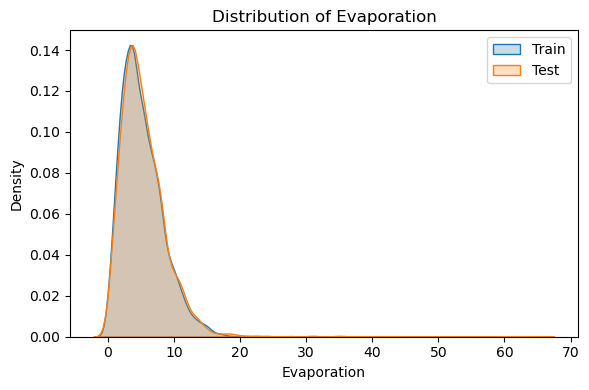

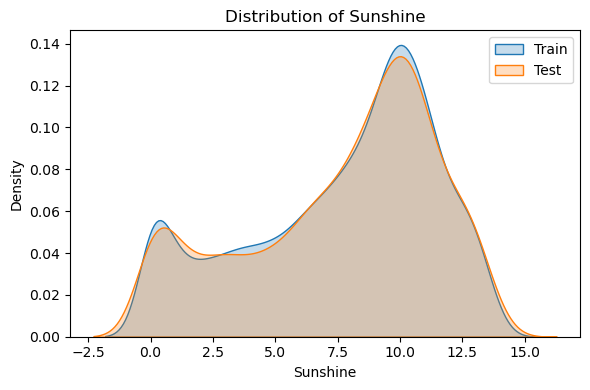

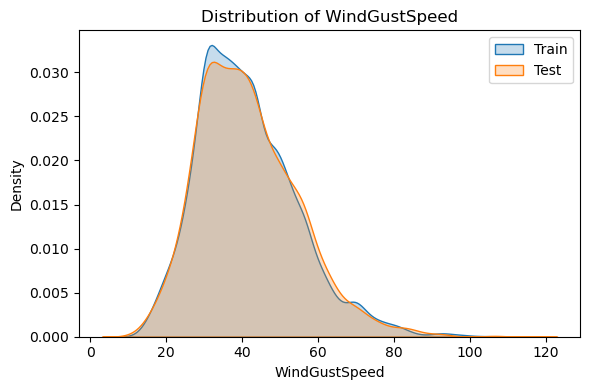

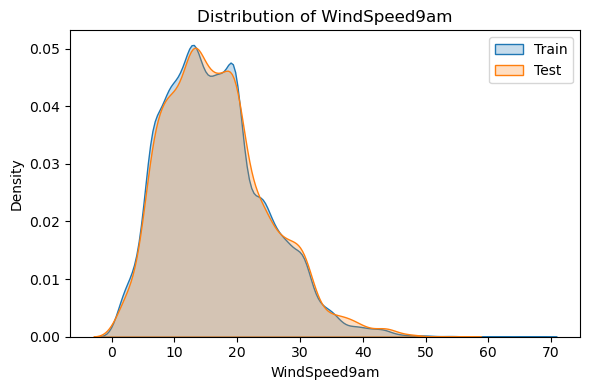

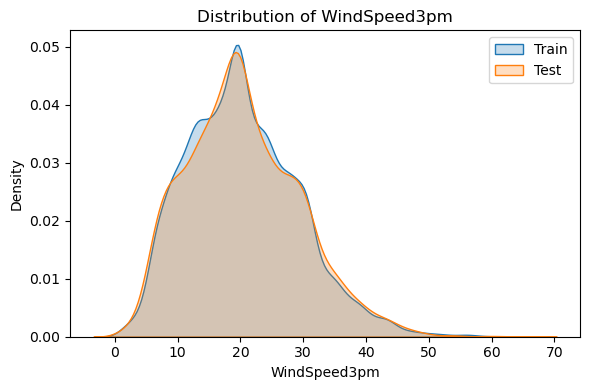

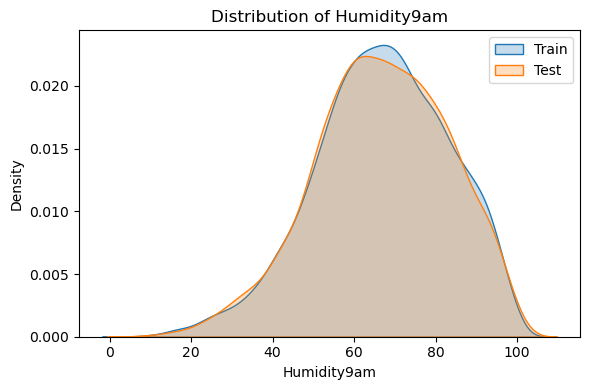

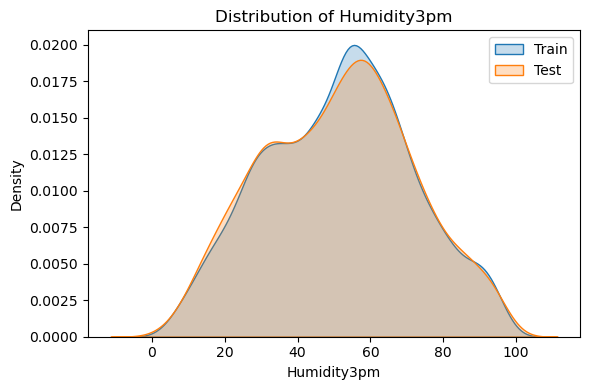

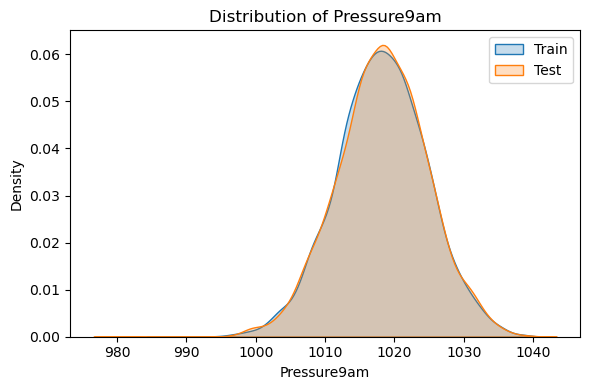

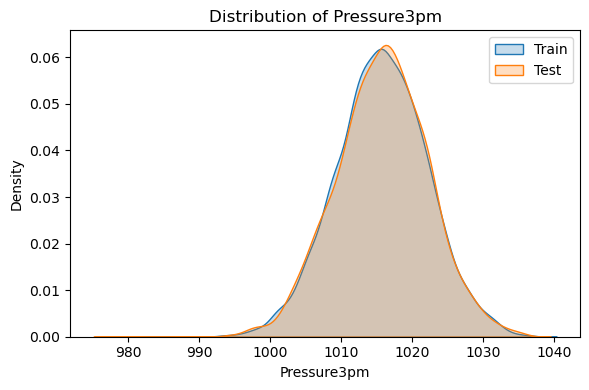

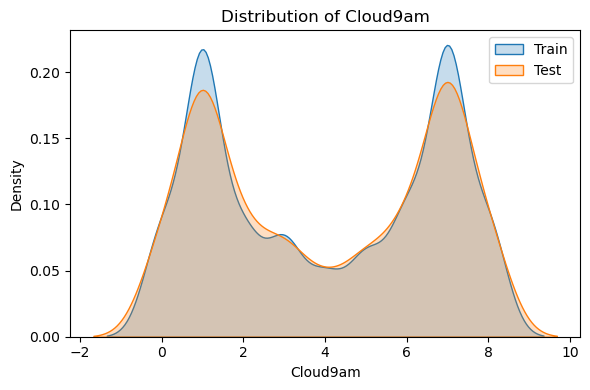

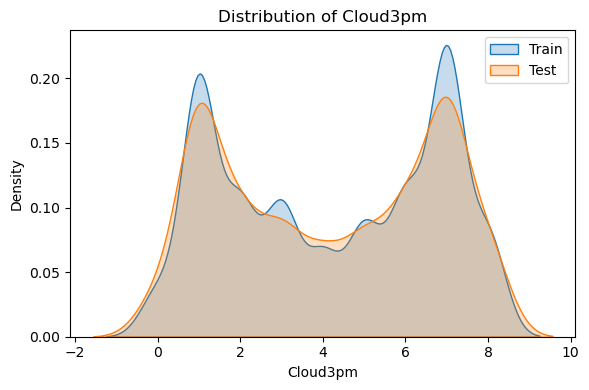

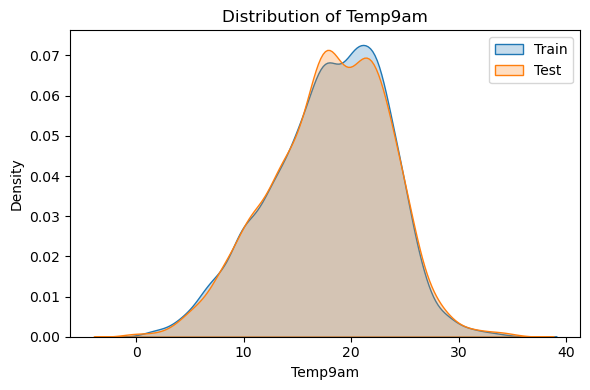

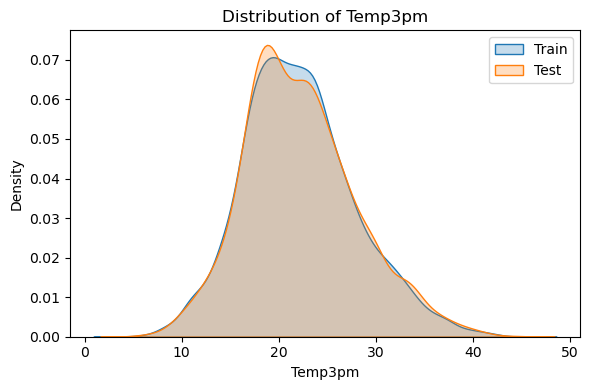

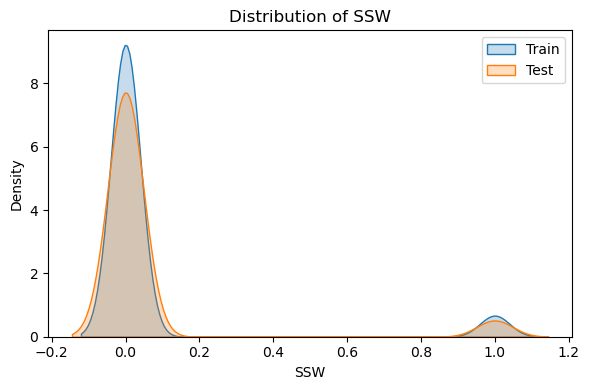

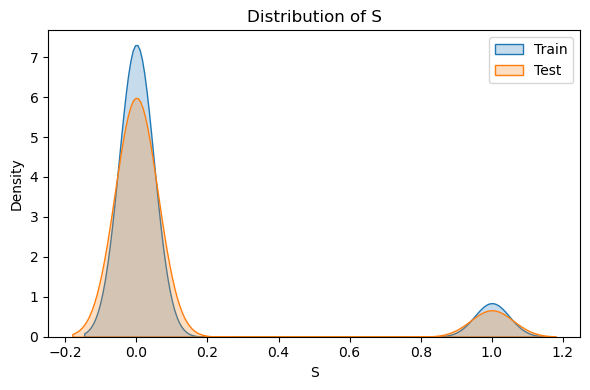

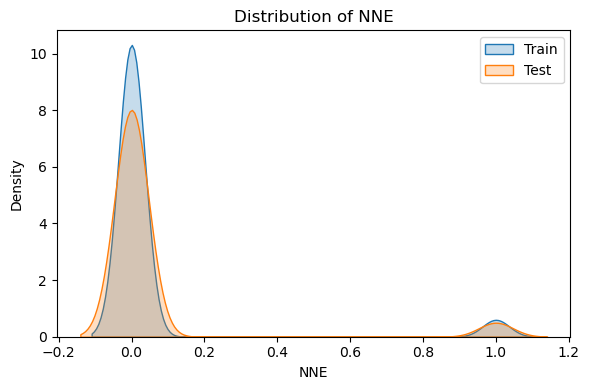

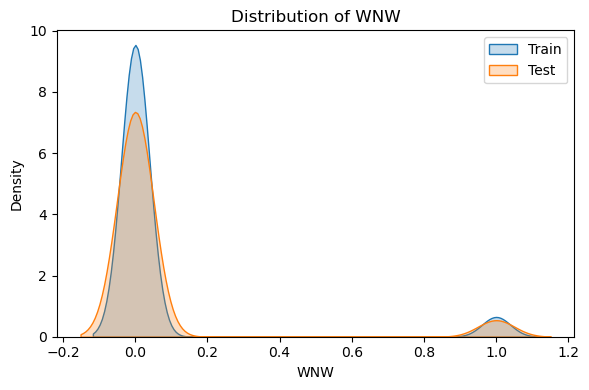

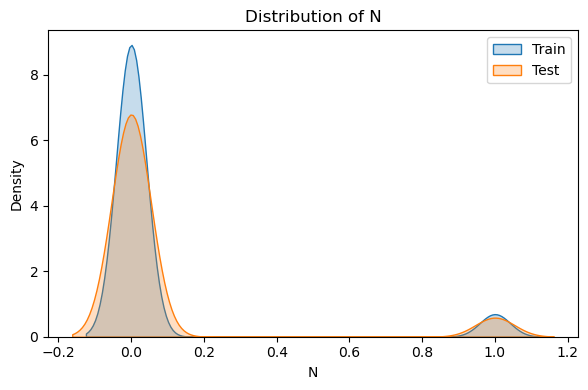

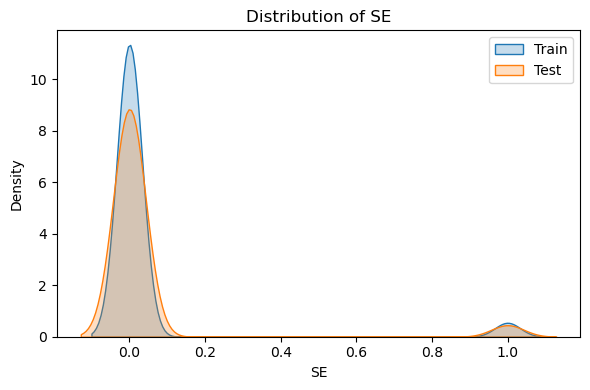

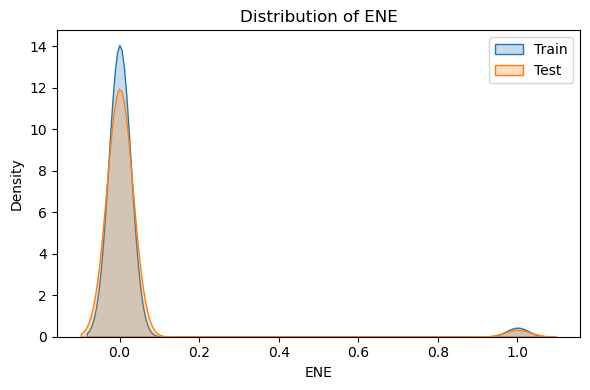

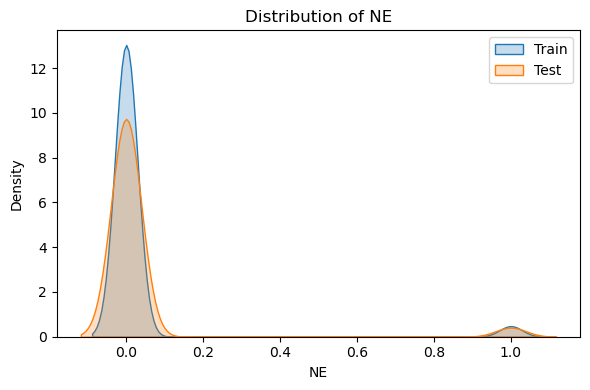

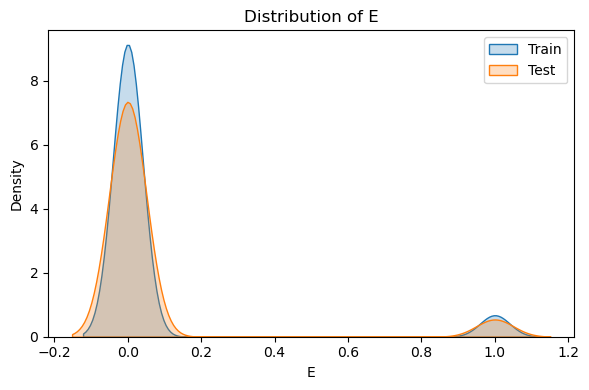

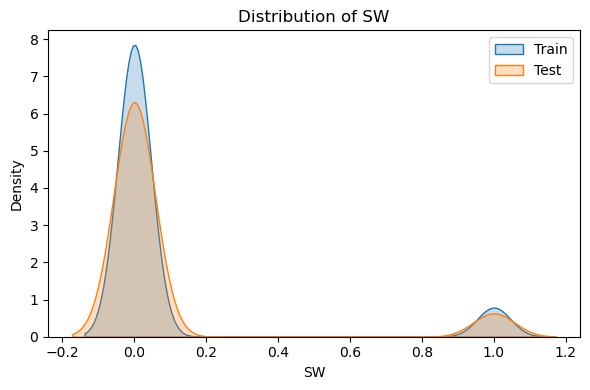

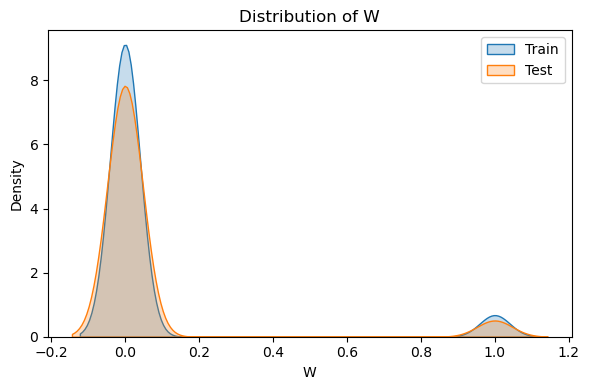

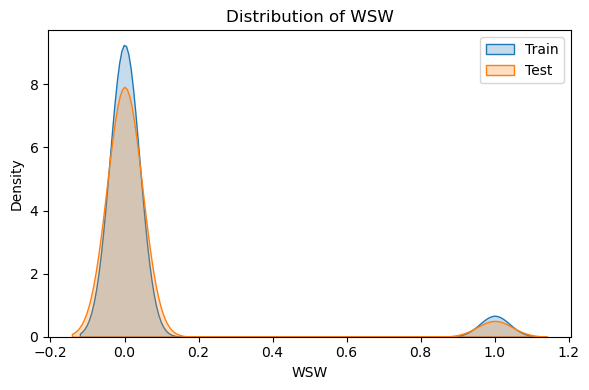

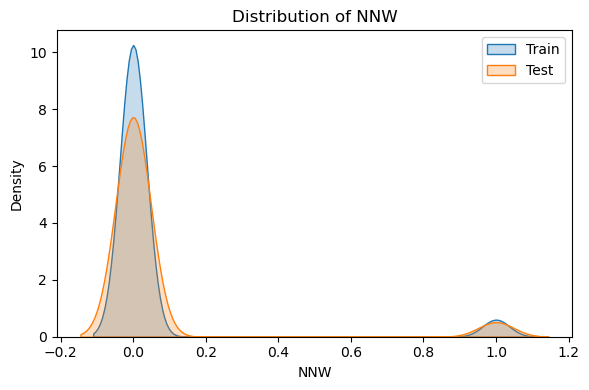

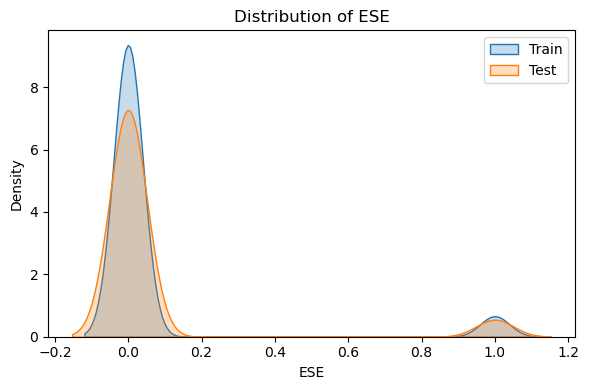

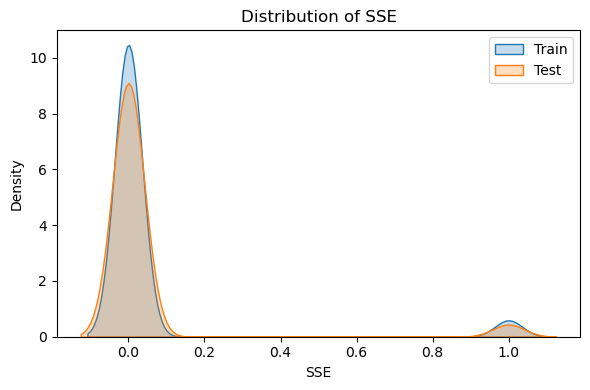

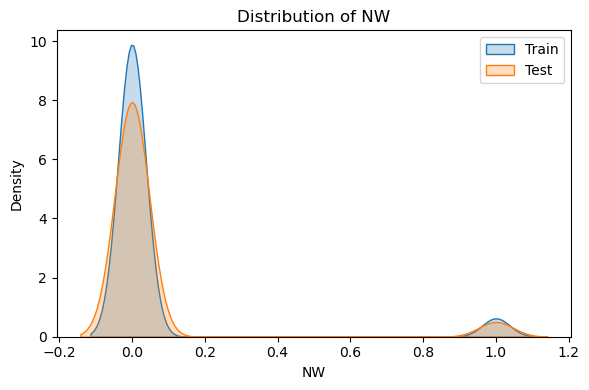

In [636]:
# plotting kde plot for each feature in train and test data set
for feature in features:
    if ((feature == 'WindGustDir') or (feature == 'WindDir9am') or (feature == 'WindDir3pm')):
        continue
    plt.figure(figsize=(6,4))
    sns.kdeplot(df_train[feature],label="Train",fill=True)
    sns.kdeplot(df_test[feature],label="Test",fill=True)
    plt.title(f"Distribution of {feature}")
    plt.legend()
    plt.tight_layout()
    plt.show()

### Interpretation  
The distribution plots reveal that the training and test sets share very similar feature distributions across all variables. This suggests that both datasets are drawn from the same underlying population, which supports the assumption that our model trained on the
training set will generalize well to the test data. No major dataset drift or feature imbalance is observed at this stage.

### Building a Random Forest Model  
In this step, we train a baseline classification model using the Random Forest algorithm. Random Forests are ensemble models that combine the predictions of multiple decision trees and generally provide strong performance out of the box.  

We use the provided training set to train the model, and then apply it to the test set to generate predictions for submission.


In [638]:
# Random Forest model
#list of results
results=[]

# Train the model
model=RandomForestClassifier(n_estimators=200, random_state=42)
model.fit(x_train,y_train)

#predict on validation set
y_pred=model.predict(x_val)

# evaluation of metrics
accuracy= accuracy_score(y_val,y_pred)
precision=precision_score(y_val,y_pred)
recall=recall_score(y_val,y_pred)
f1=f1_score(y_val,y_pred)

# saving in the result
results.append({
    "model": "Random Forest",
    "accuracy": accuracy,
    "precision" : precision,
    "recall" : recall,
    "f1 score ": f1
    
})

# printing results
for res in results:
    print(res)

{'model': 'Random Forest', 'accuracy': 0.8536506915406883, 'precision': 0.759656652360515, 'recall': 0.5078909612625538, 'f1 score ': 0.6087704213241617}


### Model Summary- Random Forest  
The Random Forest classifier demonstrated strong predictive performance on the validation set:  

Accuracy: 85.36%  

Precision: 75.96%  

Recall: 50.78%  

Fl Score: 60.87%  

These results indicate that the model achieves a well-balanced performance, especially with a high accuracy, which is crucial in scenario (e.g., predicting no rainfall when it actually rains) carry a higher cost.  

The Fl score of 0.6087 confirms that the model maintains a weak balance between precision and recall, making it a average choice for binary classification in this context. Further optimization could focus on tuning hyperparameters or applying resampling techniques if the class imbalance proves problematic during final testing.


### Logistic Regression Model

In [639]:
# Logistic Regression model
log_model=LogisticRegression(solver='lbfgs',max_iter=2000, random_state=42)
log_model.fit(x_train,y_train)

# prediction
y_pred_log= log_model.predict(x_val)

# results
accuracy_log =accuracy_score(y_val,y_pred_log)
precision_log= precision_score(y_val,y_pred_log)
recall_log=recall_score(y_val,y_pred_log)
f1_log=f1_score(y_val,y_pred_log)

results.append({
    "model": "logistic Regression",
    "accuracy": accuracy_log,
    "precision" : precision_log,
    "recall" : recall_log,
    "f1 score ": f1_log
})

# printing results
for res in results:
    print(res)

{'model': 'Random Forest', 'accuracy': 0.8536506915406883, 'precision': 0.759656652360515, 'recall': 0.5078909612625538, 'f1 score ': 0.6087704213241617}
{'model': 'logistic Regression', 'accuracy': 0.8520424573817947, 'precision': 0.7190388170055453, 'recall': 0.5581061692969871, 'f1 score ': 0.6284329563812601}


C:\Users\Paras Joshi\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


### Model summary - Logistic Regression  
The Logistic Regression demonstrated strong predictive performance on the validation set:  

Accuracy: 85.20%  

Precision: 71.90%  

Recall: 55.81%  

Fl Score: 62.84%  

These results indicate that the model achieves a well-balanced performance, especially with a high accuracy, which is crucial in scenario (e.g., predicting no rainfall when it actually rains) carry a higher cost.  

The Fl score of 0.6284 confirms that the model maintains a weak balance between precision and recall, making it a average choice for binary classification in this context. Further optimization could focus on tuning hyperparameters or applying resampling techniques if the class imbalance proves problematic during final testing.

### Gradient Boosting Classifier  


In [640]:
# Gradient Boosting Classifier
from sklearn.ensemble import GradientBoostingClassifier

#Training model
gb_model=GradientBoostingClassifier(n_estimators=100,learning_rate=0.1, random_state=42)
gb_model.fit(x_train,y_train)

# pridiction
y_pred_gb=gb_model.predict(x_val)

# evaluation
accuracy_gb= accuracy_score(y_val,y_pred_gb)
precision_gb=precision_score(y_val,y_pred_gb)
recall_gb=recall_score(y_val,y_pred_gb)
f1_gb=f1_score(y_val,y_pred_gb)

# saving in the result
results.append({
    "model": "Gradient Boosting",
    "accuracy": accuracy_gb,
    "precision" : precision_gb,
    "recall" : recall_gb,
    "f1 score ": f1_gb
    
})
# results
for res in results:
    print(res)

{'model': 'Random Forest', 'accuracy': 0.8536506915406883, 'precision': 0.759656652360515, 'recall': 0.5078909612625538, 'f1 score ': 0.6087704213241617}
{'model': 'logistic Regression', 'accuracy': 0.8520424573817947, 'precision': 0.7190388170055453, 'recall': 0.5581061692969871, 'f1 score ': 0.6284329563812601}
{'model': 'Gradient Boosting', 'accuracy': 0.8510775168864587, 'precision': 0.7321428571428571, 'recall': 0.5294117647058824, 'f1 score ': 0.6144879267277269}


### Model summary- Gradient boosting classifier  
The Gradient Boosting Classifier demonstrated strong predictive performance on the validation set:  

Accuracy: 85.10%  

Precision: 73.21%  

Recall: 52.94%  

Fl Score: 61.44%  

### Extreme Gradient Boosting

In [641]:
!pip install xgboost

In [642]:
# Extreme Gradient Boosting
from xgboost import XGBClassifier

# training
xgb_model=XGBClassifier(eval_metric='logloss', random_state=42)
xgb_model.fit(x_train,y_train)

#prediction
y_pred_xgb=xgb_model.predict(x_val)

#evaluation
accuracy_xgb= accuracy_score(y_val,y_pred_xgb)
precision_xgb=precision_score(y_val,y_pred_xgb)
recall_xgb=recall_score(y_val,y_pred_xgb)
f1_xgb=f1_score(y_val,y_pred_xgb)

# saving in the result
results.append({
    "model": "Extreme Gradient Boosting",
    "accuracy": accuracy_xgb,
    "precision" : precision_xgb,
    "recall" : recall_xgb,
    "f1 score ": f1_xgb
    
})

# results
for res in results:
    print(res)

{'model': 'Random Forest', 'accuracy': 0.8536506915406883, 'precision': 0.759656652360515, 'recall': 0.5078909612625538, 'f1 score ': 0.6087704213241617}
{'model': 'logistic Regression', 'accuracy': 0.8520424573817947, 'precision': 0.7190388170055453, 'recall': 0.5581061692969871, 'f1 score ': 0.6284329563812601}
{'model': 'Gradient Boosting', 'accuracy': 0.8510775168864587, 'precision': 0.7321428571428571, 'recall': 0.5294117647058824, 'f1 score ': 0.6144879267277269}
{'model': 'Extreme Gradient Boosting', 'accuracy': 0.8501125763911226, 'precision': 0.6981132075471698, 'recall': 0.5839311334289814, 'f1 score ': 0.6359375}


### Model summary- Extreme Gradient Boosting  
The Extreme Gradient Boosting demonstrated strong predictive performance on the validation set:  

Accuracy: 85.01%  

Precision: 69.81%  

Recall: 58.39%  

Fl Score: 63.59%  

In [647]:
# visualization of all results
def visulization(results):
    import pandas as pd
    import matplotlib.pyplot as plt
    import numpy as np

    df=pd.DataFrame(data=results)
    print(df)

    metrics=['accuracy','precision','recall','f1 score ']
    x=np.arange(len(metrics))
    width=0.1

    model_order=[
        'Random Forest',
        'logistic Regression',
        'Gradient Boosting',
        'Extreme Gradient Boosting'
    ]
    colors=['#3498db','#2ecc71','#e74c3c','#9b59b6']

    #creating plot
    plt.figure(figsize=(16,6))

    for i,model in enumerate(model_order):
        values=df[df['model'] == model][metrics].values[0]
        print(values)
        plt.bar(x + width * i ,values, width ,label = model, color = colors[i])

    plt.xticks(x+width*3.5,['Accuracy','Precision','Recall','F1 Score'])
    plt.xlabel("Evaluation metrics")
    plt.ylabel("Score")
    plt.ylim(0.4,1.02)
    plt.title("model comparision across evaluation metrics")
    plt.legend(bbox_to_anchor=(1.05,1),loc='upper left')
    plt.tight_layout()
    plt.show()

                       model  accuracy  precision    recall  f1 score 
0              Random Forest  0.853651   0.759657  0.507891   0.608770
1        logistic Regression  0.852042   0.719039  0.558106   0.628433
2          Gradient Boosting  0.851078   0.732143  0.529412   0.614488
3  Extreme Gradient Boosting  0.850113   0.698113  0.583931   0.635938
[0.85365069 0.75965665 0.50789096 0.60877042]
[0.85204246 0.71903882 0.55810617 0.62843296]
[0.85107752 0.73214286 0.52941176 0.61448793]
[0.85011258 0.69811321 0.58393113 0.6359375 ]


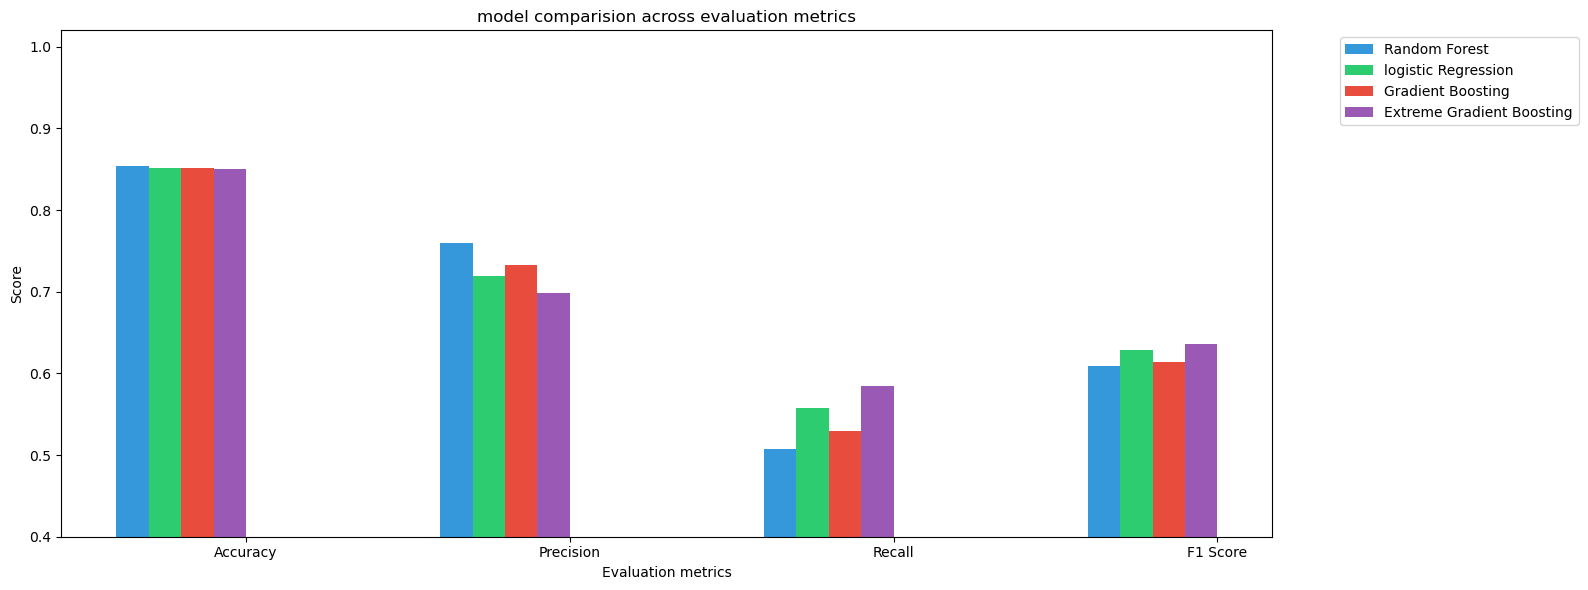

In [648]:
visulization(results)

### Conclusion: Best Performance Model  
Gradient Boosting emerges as the best-performing model overall, with the highest Fl score , indicating a strong balance between precision and recall. It also has the highest accuracy  and one of the top recall values , meaning it is excellent at identifying both rainfall and non-rainfall cases without excessive false positives.  

**Why Gradient Boosting?** Balanced Trade-off: It provides a near-optimal trade-off between true positives and false positives, which is essential in weather prediction tasks.  

**Robustness:** Gradient Boosting maintains consistency across all metrics.  

**Considerations for Deployment** If deployment speed and interpretability are critical, Logistic Regression may still be considered due to its simplicity and competitive performance. However, for best results in predictive accuracy and balance, Gradient Boosting is the most suitable model


### Comparing the best model with test dataset  

In [649]:
final_pred=xgb_model.predict(x_test)

#evaluation
accuracy_f= accuracy_score(y_test,final_pred)
precision_f=precision_score(y_test,final_pred)
recall_f=recall_score(y_test,final_pred)
f1_f=f1_score(y_test,final_pred)

print(f"accuracy= {accuracy_f}, precision= {precision_f}, recall = {recall_f}, f1 score = {f1_f}")

accuracy= 0.8388549372788678, precision= 0.6827586206896552, recall = 0.5553997194950911, f1 score = 0.6125290023201856
